# HMEQ Loss Data Preparation in R using Google Colab and rpy2 package

In [ ]:
'''
To run R in an R environment in Google Colab: https://colab.to/r
To run R in Google Colab together with Python, load the rmagic package in your Colab Python Notebook: %load_ext rpy2.ipython
Then any code cells you want to be in R, type %%R on the first line of the cell.
Then install any R packages as you would in R or RStudio.
If you only want a single line of R code in a code cell, type %R at the beginning of the R single line of code.
'''
# Load rmagic package
%load_ext rpy2.ipython

## Read in the HMEQ Data set and Explore the input and target variables using statistical techniques

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# # Install packages ggplot2, plotly, dplyr, tidyr, gridExtra
install.packages("ggplot2")
install.packages("plotly")
install.packages("dplyr")
install.packages("tidyr")
install.packages("gridExtra")
install.packages("corrplot")
# install.packages("kableExtra")
# install.packages("formattable")
#!pip install plotly==5.1.0

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Load the R packages: tidyverse, ggplot2, plotly, dplyr, tidyr, gridExtra, knitr, utils
library(tidyverse)
library(ggplot2)
library(plotly)
library(dplyr)
library(tidyr)
library(gridExtra)
library(knitr)
library(utils)
library(corrplot)

# Set width to 250
options(width=250)

# Use read.csv() to read in the HMEQ_Loss.csv data file into the dataframe df
df <- read.csv('/content/HMEQ_Loss.csv')

# Use the str() function to verify the structure of the df and view the data types
str(df)
print("")

# Define two new variables, TARGET_F and TARGET_L
TARGET_F <- "TARGET_BAD_FLAG"
TARGET_L <- "TARGET_LOSS_AMT"

# Explore the data to observe the features, data types, and range of values
print(head(df, 10))  ## print the first 10 rows of the df
print("")
# print(tail(df, 10))  ## Uncomment to print the last 10 rows of the df
# print("")
# print(t(df))         ## Uncomment to print the df columns and rows transposed
# print("")


In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Use nrow and ncol command to get the number of rows and columns in the df
print(nrow(df))
print(ncol(df))
print("")

# Alternately use the glimpse method to get the number of rows and columns in the df
# print(glimpse(df))  ## Uncomment to print the df columns and rows


# Assign our dataframe data types to variable dt
print("Variable Types")
print("--------------")
# dt <- str(df)
dt <- as.list(sapply(df, class))
print(dt)
print("")

# To see the number of missing values in every column. We will use colSums() function
# with data.frame in R.
print("Number of missing values in every column")
print("----------------------------------------")
miss_vars <- data.frame(colSums(is.na(df)))
print(miss_vars)
print("")

# Use the count() method on the TARGET_BAD_FLAG column to see the number of bad loans
loan_counts <- table(df$TARGET_BAD_FLAG)
loan_percs <- prop.table(table(df$TARGET_BAD_FLAG))
df_count <- data.frame(count = loan_counts, percentage = loan_percs)
rownames(df_count) <- c("Good", "Bad")
print("Number of bad and good loans")
print("----------------------------")
print(df_count)
print("")

# # Alternvely use dplyer function in R on the TARGET_BAD_FLAG column to see the number of bad loans
# print("Number of bad and good loans")
# print("----------------------------")
# print(dplyr::count(df, TARGET_BAD_FLAG, sort = TRUE))
# print("")

# use Summary function with transpose in R to return a description of the data
print("Summary of data")
print("---------------")
print(t(summary(df)))
print("")

## Create a subset of the HMEQ data set which includes only the "Bad" loans

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# use subset function in R to Create a subset of the HMEQ data set which includes only
# the "Bad" loans
df_bad_loans <- subset(df, TARGET_BAD_FLAG == 1)
print(head(df_bad_loans), 10)
print("")

## Find the variables that are objects (strings), integers, and floats and put them into lists by type

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Find the variables that are characters (strings), integers, and numeric (floats) and put them into lists by type
characterList <- list()
integerList <- list()
numericList <- list()

targetList <- list(TARGET_F, TARGET_L)

# # "print(" here is i .....", names(dt)[[i]], "..... and here is the type", dt[[i]] )"
# lapply(seq_along(dt),
#        function(i)
#        paste(" here is i .....", names(dt)[[i]],
#              "..... and here is the type", paste(dt[[i]], collapse = ", "))
#        )

for (i in seq_along(dt)) {
    # print(i)            ## prints index i
    # print(names(dt[i])) ## prints the variable name
    # print(dt[[i]])      ## prints variable data type
    if (names(dt[i]) %in% (targetList)) {next}
    else if (dt[[i]] =="character") {characterList <- append(characterList, names(dt[i]))}
    else if (dt[[i]] =="numeric") {numericList <- append(numericList, names(dt[i]))}
    else if (dt[[i]] =="integer") {integerList <- append(integerList, names(dt[i]))}
}

# for (i in characterList) {
#   print(names(dt[i])) ## prints the variable name
#   print(dt[[i]])      ## prints variable data type
#   # print(cat("Class =", i))
# }

print("CHARACTERS")
print("----------")
for (i in characterList) {
    print(i)
}
print("")

print("INTEGERS")
print("--------")
for (i in integerList) {
    print(i)
}
print("")

print("NUMERICS")
print("--------")
for (i in numericList) {
    print(i)
}
print("")

# Explore the categorical / character (i.e., object) variables
for (i in characterList) {
  print(paste(" Class = ", i ))

  g <- df %>% group_by( across( i ) ) %>%    ## group by categorical variable
              summarise( Count = n() ) %>%
              mutate( Freq = Count/sum( Count ) ) %>%
    as.data.frame()
  print( g )
  print("")

  x <- df %>% group_by( across( i ) ) %>%
    summarise(Bad_Loan_Probability = mean(TARGET_BAD_FLAG, na.rm = TRUE),
              .groups = 'drop') %>%
    as.data.frame()
  print( x )
  print("")

  y <- df %>% group_by( across( i ) ) %>%
    summarise(Mean_Loss_Amount = mean(TARGET_LOSS_AMT, na.rm = TRUE),
              .groups = 'drop') %>%
    as.data.frame()
  print( y )
  print(" ===============\n\n\n ")
  }


## Look for relationships between input variables and the targets

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Check correlation of input variables to target "TARGET_BAD_FLAG" (TARGET_F = TARGET_BAD_FLAG)
corr_to_TARGET_BAD_FLAG <- cor(df[sapply(df,is.numeric)], df$TARGET_BAD_FLAG, use = "pairwise.complete.obs")
# Make a dataframe from variable names and correlations
df_corr_to_TARGET_BAD_FLAG <- data.frame(variable = c(names(df[sapply(df,is.numeric)])), correlation = c(corr_to_TARGET_BAD_FLAG))
# print correlations in descending order
print("Correlation of input variables to the variable TARGET_BAD_FLAG")
print("--------------------------------------------------------------")
print(arrange(df_corr_to_TARGET_BAD_FLAG, -correlation))
print("")

# # Check correlation of input variables to target "TARGET_LOSS_AMT" (TARGET_L = TARGET_LOSS_AMT)
corr_to_TARGET_LOSS_AMT <- cor(df[sapply(df,is.numeric)], df$TARGET_LOSS_AMT, use = "pairwise.complete.obs")
# Make a dataframe from variable names and correlations
df_corr_to_TARGET_LOSS_AMT <- data.frame(variable = c(names(df[sapply(df,is.numeric)])), correlation = c(corr_to_TARGET_LOSS_AMT))
# print correlations in descending order
print("Correlation of input variables to the variable TARGET_LOSS_AMT")
print("--------------------------------------------------------------")
print(arrange(df_corr_to_TARGET_LOSS_AMT, -correlation))
print("")

# # Create correlation matrix of the numeric variables in our dataframe df
corr_matrix <- cor(df[sapply(df,is.numeric)], use = "pairwise.complete.obs")
print("Correlation of numeric variables")
print("--------------------------------")
print(corr_matrix)
print("")

## Explore the input and target variables using graphs and visualizations

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

loan_counts <- table(df$TARGET_BAD_FLAG)
# print(loan_counts)
# print("")

# Calculate percentages
pct <- round(100*loan_counts/sum(loan_counts), 2)
# print(pct)
# print("")

df_pie1 <- data.frame(loan_counts, pct)
print(df_pie1)
print(table(df_pie1$loan_counts))
print(table(df_pie1$pct))
print("")
# print(as.data.frame(df_pie1[,1])
print("")
# print(as.data.frame(df_pie1[,2])
print("")
print(paste(df_pie1$pct, sep = "", pct, "%"))
print("")

df
loan_counts <- table(df$TARGET_BAD_FLAG)
# print(loan_counts)
loan_percs <- prop.table(table(df$TARGET_BAD_FLAG))
# print(loan_percs)
df_count <- data.frame(count = loan_counts, percentage = loan_percs)
rownames(df_count) <- c("Good", "Bad")
# print("This is df_count")
# print(df_count)

# Create PIE CHARTS of classes
# Use subplots to plot five plots in two rows by three columns
fig <- plot_ly()

# Look at Bad vs Good (Not Bad) Loans Pie chart for plot one
myLabels <- c('0 = "Good"', '1 = "Bad"')
mySlices <- as.list(count(df, TARGET_BAD_FLAG))
fig <- fig %>% add_pie(data = mySlices,
                       values = ~n,
                       labels = myLabels,
                       marker=list(colors=c("blue","orange")),
                       textinfo='label+value',
                       insidetextorientation='horizontal',
                       pull = c(0, 0.2),
                       name = "Bad vs. Good",
                       title = list(text = "<b> Bad vs. Good Loans\n(5960 total loans) <br> </b>", y=1.0, x=0.5,
                                    xanchor='center', yanchor='top', size=15),
                       rotation = 350,
                       domain = list(row = 0, column = 0))

# Look at Total Loans by Reason Pie chart for plot two
a <- table(df$REASON, useNA = "ifany")
reasonLabels <- c("nan", "DebtCon", "HomeImp")
reasonSlices <- as.list(count(df, REASON))
# print(reasonSlices)
fig <- fig %>% add_pie(data = reasonSlices,
                       values = ~n,
                       labels = reasonLabels,
                       marker=list(colors=c("green", "blue", "orange")),
                       textinfo='label+value',
                       insidetextorientation='horizontal',
                       pull = c(0.2, 0.1, 0),
                       name = "Total Loans by Reason",
                       title = list(text = "<b> Total Loans by Reason <br> </b>", y=1.0, x=0.5,
                                    xanchor='center', yanchor='top', size=15),
                       rotation = 60,
                       domain = list(row = 0, column = 1))

# Look at Total Loans by Job Type Pie chart for plot three
b <- table(df$REASON, useNA = "ifany")
jobLabels <- c("Self", "Sales", "Other", "ProfExe", "Office", "Mgr", "nan")
jobSlices <- as.list(count(df, JOB))
# print(jobSlices)
fig <- fig %>% add_pie(data = jobSlices,
                       values = ~n,
                       labels = jobLabels,
                       marker=list(colors=c("purple", "red", "green", "blue", "orange", "magenta", "brown")),
                       textinfo='label+value',
                       insidetextorientation='horizontal',
                       pull = c(0.1, 0, 0, 0, 0, 0.1, 0.2),
                       name = "Total Loans by Job",
                       title = list(text = "<b> Total Loans by Job <br> </b>", y=1.0, x=0.5,
                                    xanchor='center', yanchor='top', size=15),
                       rotation = 120,
                       domain = list(row = 0, column = 2))

# subplot position four intentionally left empty

# Look at Bad Loans by Loan Reason Pie chart for plot five
bad_reasonLabels <- c("nan", "DebtCon", "HomeImp")
bad_reasonSlices <- as.list(count(df_bad_loans, REASON))
print(bad_reasonSlices)
fig <- fig %>% add_pie(data = bad_reasonSlices,
                       values = ~n,
                       labels = bad_reasonLabels,
                       marker=list(colors=c("green", "blue", "orange")),
                       textinfo='label+value',
                       insidetextorientation='horizontal',
                       pull = c(0.2, 0.1, 0),
                       name = "Bad Loans by Reason",
                       title = list(text = "<b> Bad Loans by Reason <br> </b>", y=1.0, x=0.5,
                                    xanchor='center', yanchor='top', size=15),
                       rotation = 60,
                       domain = list(row = 1, column = 1))

# Look at Total Loans by Job Type Pie chart for plot three
b <- table(df$REASON, useNA = "ifany")
bad_jobLabels <- c("Self", "Sales", "Other", "ProfExe", "Office", "Mgr", "nan")
bad_jobSlices <- as.list(count(df_bad_loans, JOB))
# print(jobSlices)
fig <- fig %>% add_pie(data = bad_jobSlices,
                       values = ~n,
                       labels = bad_jobLabels,
                       marker=list(colors=c("purple", "red", "green", "blue", "orange", "magenta", "brown")),
                       textinfo='label+value',
                       insidetextorientation='horizontal',
                       fontsize=8,
                       pull = c(0.1, 0, 0, 0, 0, 0.1, 0.2),
                       name = "Bad Loans by Job",
                       title = list(text = "<b> Bad Loans by Job <br> </b>", y=1.0, x=0.5,
                                    xanchor='center', yanchor='top', size=15),
                       rotation = 90,
                       domain = list(row = 1, column = 2))

fig <- fig %>% layout(showlegend = F, grid=list(rows=2, columns=3),
                      xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
                      yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))

fig


### The rp2 package wouldn't display the pie charts from the R code above so I ran it in RStudio and embedded the image of the pie charts in this markdown cell.
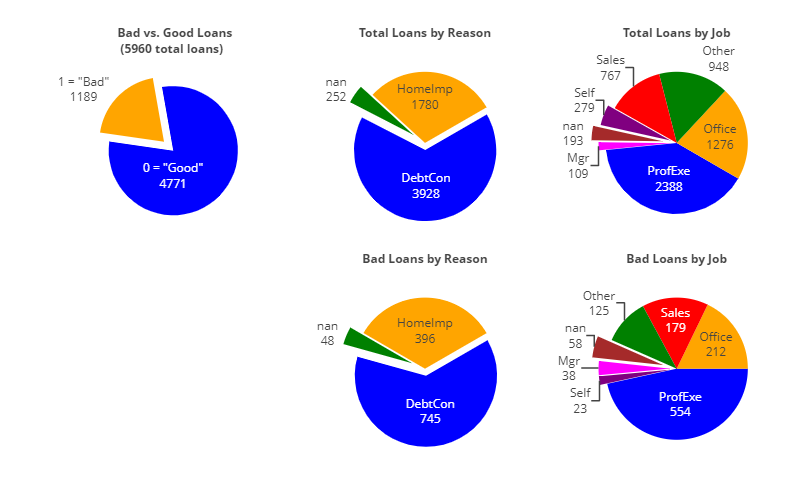

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Reset the layout to default
par(mfrow = c(1, 1))

# # Create histograms of integers
print("Histograms of Integers")
print("----------------------")
# Loop through 'integerList' and create histograms
for (i in integerList) {
    hist(df[[i]], col = 'blue', main = i, xlab = i)
}
print("")

# #Create histogram of Loan Losses
# print("Histogram of Loan Losses")
# print("-------------------------")
# hist(df$TARGET_L, main = "Loan Losses", xlab = "Loan Losses")
# print()

# # Create correlation heatmap of numeric variables
# print("Correlation Heatmap of Numeric Varibles")
# print("-----------------------------------")
# f <- 10  # Set the size of the plot
# corrplot(corr_matrix, method = "color", type = "upper", order = "hclust",
#          tl.col = "black", tl.srt = 45, addCoef.col = "black",
#          tl.cex = 0.7, cl.cex = 0.7, number.cex = 0.7, tl.offset = 1,
#          diag = FALSE, addrect = 5, mar = c(0, 0, 2, 0))
# title("Correlation Heatmap of Numeric Variables", cex.main = 1.5)

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Reset the layout to default
par(mfrow = c(1, 1))

for (i in numericList) {
    print(i)
}

# Create histograms of numerics (a.k.a., Floats)
print("Histograms of numerics (a.k.a., Floats)")
print("--------------------------------------")
for (i in numericList) {
  hist(df[[i]], col = 'blue', main = i, xlab = i)
}
print("")


In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Reset the layout to default
par(mfrow = c(1, 1))

#Create histogram of Loan Losses
print("Histogram of Loan Losses")
print("-------------------------")
hist(df$TARGET_L, col = 'blue', main = "Loan Losses", xlab = "Loan Losses")
print("")


In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Create correlation heatmap of numeric variables
# Check for NA and Inf values in the correlation matrix
has_na <- any(is.na(corr_matrix))
has_inf <- any(!is.finite(corr_matrix))

if (has_na || has_inf) {
  # Handle missing or infinite values (e.g., by replacing them with zeros)
  corr_matrix[is.na(corr_matrix) | !is.finite(corr_matrix)] <- 0
}
f <- 10  # Set the size of the plot
# Create the correlation heatmap
print("Correlation Heatmap of Numeric Varibles")
print("---------------------------------------")
corrplot(corr_matrix, method = "color", type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45, addCoef.col = "black",
         tl.cex = 0.7, cl.cex = 0.7, number.cex = 0.7, tl.offset = 1,
         diag = FALSE, addrect = 5, mar = c(0, 0, 2, 0))
title("Correlation Heatmap of Numeric Variables", cex.main = 1.5)


In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

library(psych)

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Select only the numeric columns from 'df'
numeric_df <- df[sapply(df, is.numeric)]

# Set the size of the plotting device and adjust outer margins
par(oma = c(10, 10, 10, 10))  # Increase the values within 'oma' as needed
plot.new()

# Create pair plots of all the numeric variables to visualize relationships of the variable pairs
print("Pair Plots of Numeric Variables")
print("-------------------------------")
pairs(numeric_df, col = 'blue', pch = 19, cex = 0.5)  # Adjust 'pch' and 'cex' as needed
print("")


### Abbreviated Observations on the HMEQ Data set (copied from Python Section above):
We see the data set has 5960 rows representing the number of loans and 14 columns representing the features. We see of the 5960 loans, there are 4771 (80.1%) Good loans and 1189 (19.9%) Bad loans.

## Impute missing data in R

##### The TARGET_LOSS_AMT columns has 4771 Nulls. Since the TARGET_LOSS_AMT column only has values for the loans the banks lost money on, we will impute the TARGET_LOSS_AMT column's null values with the value 0.

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Since the TARGET_LOSS_AMT column only has values for the loans the banks lost money
# on, we will impute the TARGET_LOSS_AMT column's null values with the value 0.

# Create a flag variable and Add new column 'imputeTARGET_LOSS_AMT' to our dataframe to indicate imputed
# Create a new column 'imputeTARGET_LOSS_AMT' and set it to 1 for missing values in 'TARGET_LOSS_AMT', 0 otherwise
df$imputeTARGET_LOSS_AMT <- ifelse(is.na(df$TARGET_LOSS_AMT), 1, 0)

# Add new column IMP_TARGET_LOSS_AMT to our dataframe for new imputed values
# Create a new column 'IMP_TARGET_LOSS_AMT' and assign values from 'TARGET_LOSS_AMT' if not null, otherwise assign 0
df$IMP_TARGET_LOSS_AMT <- ifelse(!is.na(df$TARGET_LOSS_AMT), df$TARGET_LOSS_AMT, 0)

# Drop the 'TARGET_LOSS_AMT' variable after creating new variables 'imputeTARGET_LOSS_AMT' and 'IMP_TARGET_LOSS_AMT'
df <- df[, !names(df) %in% "TARGET_LOSS_AMT"]

# View the updated data frame
head(df)

##### The MORTDUE column has 518 Null values, and the VALUE column has 112 Null values. There are no addresses, geographic coordinates, or zipcodes included in our HMEQ data set to permit us to estimate the home values and mortgages based upon other home values and mortgages in the same neighborhoods. Nor is there any information included for the initial mortgage amount, type of mortgage (e.g., fixed or variable rate), length of initial mortgage period (e.g., 10 yr, 15 yr, 30 yr), or number of mortgage payments remaining. Therefore for this study, we will impute the VALUE Nulls with the median VALUE, and we will impute the MORTDUE Nulls with the home VALUE where identified, or the IMP_VALUE where the home VALUE is Null.

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Impute VALUE column Null values with the VALUE median value.

# Create a flag variable and Add new column 'imputeVALUE' to our dataframe to indicate imputed
df$imputeVALUE <- ifelse(is.na(df$VALUE), 1, 0)

# Add new column IMP_VALUE to our dataframe for new imputed values
df$IMP_VALUE <- ifelse(!is.na(df$VALUE), df$VALUE, median(df$VALUE, na.rm = TRUE))

# Drop the 'VALUE' variable after creating new variables 'imputeVALUE' and 'IMP_VALUE'
df <- df[, !names(df) %in% "VALUE"]

# Create a flag variable and Add new column 'imputeMORTDUE' to our dataframe to indicate imputed
df$imputeMORTDUE <- ifelse(is.na(df$MORTDUE), 1, 0)

# Add new column IMP_MORTDUE to our dataframe for new imputed values
df$IMP_MORTDUE <- ifelse(!is.na(df$MORTDUE), df$MORTDUE, median(df$MORTDUE, na.rm = TRUE))

# Drop the 'MORTDUE' variable after creating new variables 'imputeMORTDUE' and 'IMP_MORTDUE'
df <- df[, !names(df) %in% "MORTDUE"]

# View the updated data frame
head(df)


##### The REASON column has 252 (4.2%) Null values. We also see the REASON column has 3928 (65.9%) DebtCon values, and 1780 (29.9%) HomeImp values. We will impute the REASON Nulls with the REASON mode value (mode = most common value).

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

mode_reason <- as.character(mode(table(df$REASON)))
print(mode_reason)

# # Calculate the count of unique values in the 'reason' column
# reason_counts <- table(df$rREASON)
# reason_counts

In [ ]:
%%R ## R code cells must start with %%R in Python Runtime

# Impute REASON column Null values with the REASON mode value.

# Create a flag variable and Add new column 'imputeREASON' to our dataframe to indicate imputed
df$imputeREASON <- ifelse(is.na(df$REASON), 1, 0)

# Add new column IMP_REASON to our dataframe for new imputed values
df$IMP_REASON <- ifelse(!is.na(df$REASON), df$REASON, as.character(mode(table(df$REASON))))

# Drop the 'REASON' variable after creating new variables 'imputeREASON' and 'IMP_REASON'
df <- df[, !names(df) %in% "REASON"]

# View the updated data frame
head(df)


# My observations from attempting to perfom Assignment 1 in R are that it took significantly longer (days) to write the code in R to perform the same Exploratory Data Analysis and imputing null values, especially with creating the charts and visuals. I wasn't able to complete all of it in R before the Sunday night deadline. I would recommend using Python for most of this kind of coding work and for the charts and visuals, and only use R when moew advanced statistical analysis is needed.

## The rpy2 package didn't want to create the plotly charts in R for the pie charts in R and I had to run the R code in RStudio to generate the charts and then embed the image of the pie charts in a markdown cell in R.